In [17]:
# barplot
# https://12jeong.github.io/python-barplot/

# plot color
# https://matplotlib.org/stable/gallery/color/named_colors.html

# 신뢰 구간
# https://angie-gil.medium.com/평점-순으로-정렬하지-않는-법-이론편-9ced2f26bc4b

# cv
# https://coding-potato.tistory.com/15
# https://jimmy-ai.tistory.com/178

# Import Dataset and Libraries

In [64]:
from typing import Any
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic')

In [19]:
preprocess_file = "./preprocessing.csv"

drop_columns = [
    'index',
    'date',
#    'round',
#    'game_count',
#    'game_goal',
#    'cur_game_count',
#    'win_odds',
#    'lose_odds',
    'track_E',
#    'cc',
#    'part_people',
#    'rank',
#    'prefix_rank',
    'odds_result',
    'significant',
#    'RESULT',
#    'track_E_encoded',
#    'odds_result_SU',
#    'odds_result_UD',
]

df_pp = pd.read_csv(preprocess_file)
df_pp = df_pp.drop(drop_columns, axis=1)

In [20]:
df_pp.head()

,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,cc,part_people,rank,prefix_rank,RESULT,track_E_encoded,odds_result_SU,odds_result_UD
0,1,3,15,1,4.71,1.27,150,10,10,10,False,41,1,0
1,1,3,15,2,4.71,1.27,150,12,7,17,False,20,1,0
2,2,3,15,1,7.04,1.17,150,11,2,2,True,41,0,1
3,2,3,15,2,7.04,1.17,150,11,5,7,True,0,0,1
4,2,3,15,3,7.04,1.17,150,12,5,12,True,18,0,1


In [21]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   round            620 non-null    int64  
 1   game_count       620 non-null    int64  
 2   game_goal        620 non-null    int64  
 3   cur_game_count   620 non-null    int64  
 4   win_odds         620 non-null    float64
 5   lose_odds        620 non-null    float64
 6   cc               620 non-null    int64  
 7   part_people      620 non-null    int64  
 8   rank             620 non-null    int64  
 9   prefix_rank      620 non-null    int64  
 10  RESULT           620 non-null    bool   
 11  track_E_encoded  620 non-null    int64  
 12  odds_result_SU   620 non-null    int64  
 13  odds_result_UD   620 non-null    int64  
dtypes: bool(1), float64(2), int64(11)
memory usage: 63.7 KB


# Modeling Data Subset

In [22]:
X = df_pp
X, y_rank, y_result = X.drop(['rank', 'RESULT'], axis=1), X['rank'], X['RESULT'].astype(bool)

In [23]:
X.head()

,round,game_count,game_goal,cur_game_count,win_odds,lose_odds,cc,part_people,prefix_rank,track_E_encoded,odds_result_SU,odds_result_UD
0,1,3,15,1,4.71,1.27,150,10,10,41,1,0
1,1,3,15,2,4.71,1.27,150,12,17,20,1,0
2,2,3,15,1,7.04,1.17,150,11,2,41,0,1
3,2,3,15,2,7.04,1.17,150,11,7,0,0,1
4,2,3,15,3,7.04,1.17,150,12,12,18,0,1


# Modeling

In [24]:
!python --version

Python 3.11.5


In [25]:
# !python.exe -m pip install --upgrade pip
# !pip install scikit-learn
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.base import BaseEstimator

# Classification Model Import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Regression Model Import
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [27]:
clf_model_dict = {
    "clf_ridge": LogisticRegression(penalty='l2', solver='lbfgs'),
    "clf_lasso": LogisticRegression(penalty='l1', solver='liblinear'),
    "clf_logistic_regression": LogisticRegression(),
    "clf_logistic_regression_": LogisticRegression(solver='liblinear'),
    "clf_adaboost": AdaBoostClassifier(),
    "clf_gradient_boosting": GradientBoostingClassifier(),
    "clf_random_forest": RandomForestClassifier(),
    "clf_xgb": XGBClassifier(),
    "clf_xgb_": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "clf_lgbm": LGBMClassifier(),
#     "clf_catboost": CatBoostClassifier(verbose=0),
}

reg_model_dict = {
    "reg_ridge": Ridge(),
    "reg_lasso": Lasso(),
    "reg_linear_regression": LinearRegression(),
    "reg_adaboost": AdaBoostRegressor(),
    "reg_gradient_boosting": GradientBoostingRegressor(),
    "reg_random_forest": RandomForestRegressor(),
    "reg_xgb": XGBRegressor(),
#     "reg_lgbm": LGBMRegressor(),
#     "reg_catboost": CatBoostRegressor(verbose=0),
}

# Training Model

In [28]:
from sklearn.model_selection import train_test_split


def fit_model(
    model: BaseEstimator,
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42
) -> tuple[BaseEstimator, pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size = test_size,
        random_state = random_state
    )
    model.fit(X_train, y_train)
    
    return model, X_train, X_test, y_train, y_test

# Evaluate Model

## Classification

In [29]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)


def eval_clf_model(model: BaseEstimator, X: pd.DataFrame, y: pd.Series) -> tuple[float]:
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    accuracy = accuracy_score(y, y_pred)      # 정확도
    precision = precision_score(y, y_pred)    # 정밀도
    recall = recall_score(y, y_pred)          # 재현율
    f1 = f1_score(y, y_pred)                  # F1 점수
    roc_auc = roc_auc_score(y, y_proba)       # ROC-AUC 점수
    
    return accuracy, precision, recall, f1, roc_auc

## Regression

In [30]:
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error
)


def eval_reg_model(model: BaseEstimator, X: pd.DataFrame, y: pd.Series) -> tuple[float]:
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)                # R² 점수
    mae = mean_absolute_error(y, y_pred)    # 평균 절대 오차 (MAE)
    mse = mean_squared_error(y, y_pred)     # 평균 제곱 오차 (MSE)
    rmse = mean_squared_error(y, y_pred, squared=False)    # 평균 제곱근 오차 (RMSE)

    return r2, mae, mse, rmse

# K-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from collections import defaultdict

## Classification

In [32]:
# cross_val_score의 estimator가 classifier 종류이면 내부적으로 stratified KFold 로 진행
def clf_cross_validation(
    model: BaseEstimator,
    X: pd.DataFrame,
    y: pd.Series,
    cv: int = 5
) -> tuple[list[float]]:
    
    # No1 cv
    scores1 = dict()
    scores1['cvs_acc'] = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    scores1['cvs_pre'] = cross_val_score(model, X, y, cv=cv, scoring='precision')
    scores1['cvs_rec'] = cross_val_score(model, X, y, cv=cv, scoring='recall')
    scores1['cvs_f1 '] = cross_val_score(model, X, y, cv=cv, scoring='f1')
    scores1['cvs_roc'] = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    # No2 cv    
    scores2 = dict()
    skfolds = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    scores2['mix_acc'] = cross_val_score(model, X, y, cv=skfolds, scoring='accuracy')
    scores2['mix_pre'] = cross_val_score(model, X, y, cv=skfolds, scoring='precision')
    scores2['mix_rec'] = cross_val_score(model, X, y, cv=skfolds, scoring='recall')
    scores2['mix_f1 '] = cross_val_score(model, X, y, cv=skfolds, scoring='f1')
    scores2['mix_roc'] = cross_val_score(model, X, y, cv=skfolds, scoring='roc_auc')
    
    # No3 cv
    scores3 = defaultdict(list)
    for fold_idx, (train_idx, val_idx) in enumerate(skfolds.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        scores = eval_clf_model(model, X_val, y_val)
        accuracy, precision, recall, f1, roc_auc = scores
        
        scores3['skf_acc'].append(accuracy)
        scores3['skf_pre'].append(precision)
        scores3['skf_rec'].append(recall)
        scores3['skf_f1 '].append(f1)
        scores3['skf_roc'].append(roc_auc)
    
    return scores1,scores2, scores3

In [49]:
def print_clf_score(
    model: BaseEstimator,
    scores1: dict,
    scores2: dict,
    scores3: dict
) -> None:
       
    # Scores1: cross_val_score
    for key, value in scores1.items():
        print(f'{key}: {np.mean(value)}')

    # Scores2: StratifiedKFold by cross_val_score
    for key, value in scores2.items():
        print(f'{key}: {np.mean(value)}')

    # Scores3: StratifiedKFold score
    for key, value in scores3.items():
        print(f'{key}: {np.mean(value)}')

## clf 모델 점수 평가

In [173]:
df_clf_scores = pd.DataFrame()
Y = y_result

for model_name, model in tqdm(clf_model_dict.items()):
    model, X_train, X_test, y_train, y_test = fit_model(model, X, Y)    
    scores1, scores2, scores3 = clf_cross_validation(
        model,
        X_train,
        y_train,
        5
    )
    
    # print_clf_score(model, scores1, scores2, scores3)
    values = (
        [np.mean(s) for s in scores1.values()] + 
        [np.mean(s) for s in scores2.values()] + 
        [np.mean(s) for s in scores3.values()]
    )    
    
    df_tmp = pd.DataFrame({model_name: values})
    df_clf_scores = pd.concat([df_clf_scores, df_tmp], axis=1)
    
keys = [k for k in scores1.keys()] + [k for k in scores2.keys()] + [k for k in scores3.keys()]
df_clf_scores = pd.concat([df_clf_scores, pd.DataFrame({"name":keys})], axis=1)
df_clf_scores

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:30<00:00,  3.43s/it]


,clf_ridge,clf_lasso,clf_logistic_regression,clf_logistic_regression_,clf_adaboost,clf_gradient_boosting,clf_random_forest,clf_xgb,clf_xgb_,name
0,0.903172,0.909212,0.903172,0.905192,0.939515,0.995980,0.987919,0.991939,0.991939,cvs_acc
1,0.829984,0.850051,0.829984,0.842115,0.909871,0.992857,1.000000,1.000000,1.000000,cvs_pre
2,0.804558,0.804843,0.804558,0.797151,0.865242,0.992593,0.954986,0.970085,0.970085,cvs_rec
3,0.816421,0.825400,0.816421,0.817695,0.884912,0.992590,0.980836,0.984758,0.984758,cvs_f1
4,0.951430,0.953420,0.951430,0.952389,0.973680,1.000000,0.999487,1.000000,1.000000,cvs_roc
5,0.903212,0.909273,0.903212,0.911293,0.919333,0.995980,0.985879,0.993939,0.993939,mix_acc
6,0.857142,0.860448,0.857142,0.867695,0.884712,0.992593,1.000000,1.000000,1.000000,mix_pre
7,0.767236,0.789459,0.767236,0.789459,0.810826,1.000000,0.947293,0.977208,0.977208,mix_rec
8,0.808977,0.823101,0.808977,0.826238,0.842337,0.992453,0.971867,0.988226,0.988226,mix_f1
9,0.947322,0.950741,0.947322,0.950743,0.941549,1.000000,0.999490,1.000000,1.000000,mix_roc


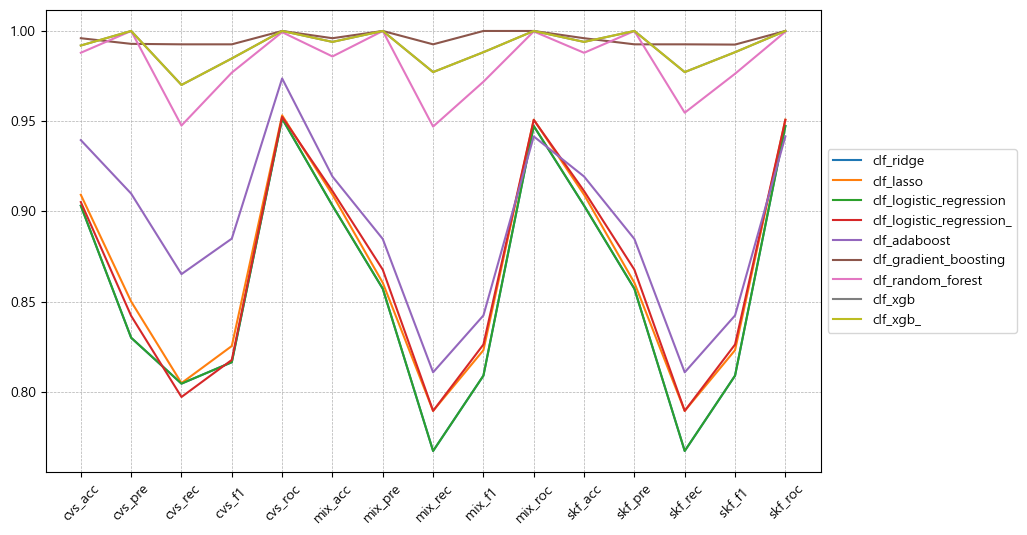

In [163]:
# https://stackoverflow.com/questions/26358200/xticks-by-pandas-plot-rename-with-the-string

df_clf_scores.plot(
    figsize = (10, 6),
    rot = 45
).set_xticks(df_clf_scores.index, df_clf_scores.name)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, axis='x')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

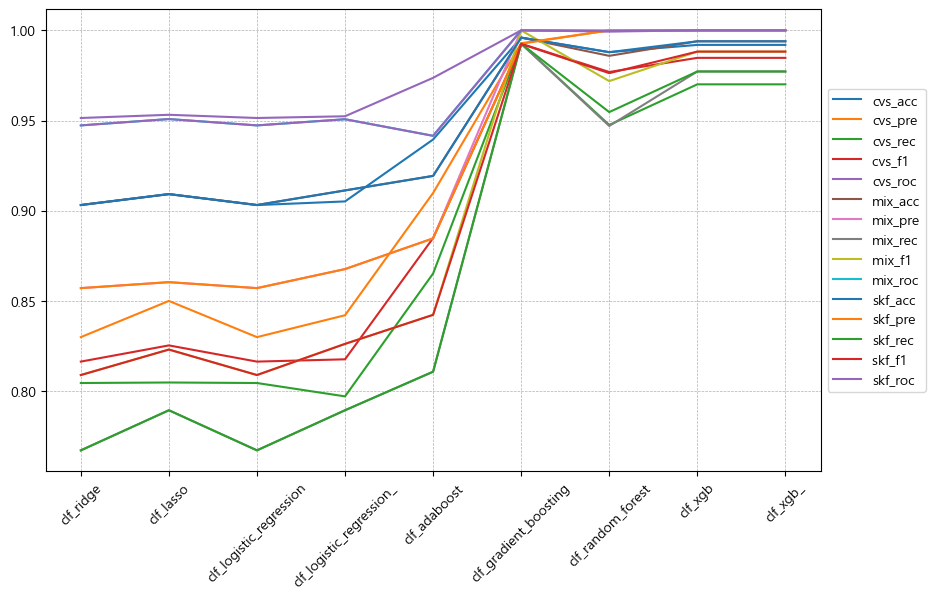

In [164]:
# https://stackoverflow.com/questions/42381639/how-do-i-transpose-dataframe-in-pandas-without-index
# https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv

df_clf_scores.set_index('name').T.plot(
    figsize = (10, 6),
    rot = 45
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, axis='x')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

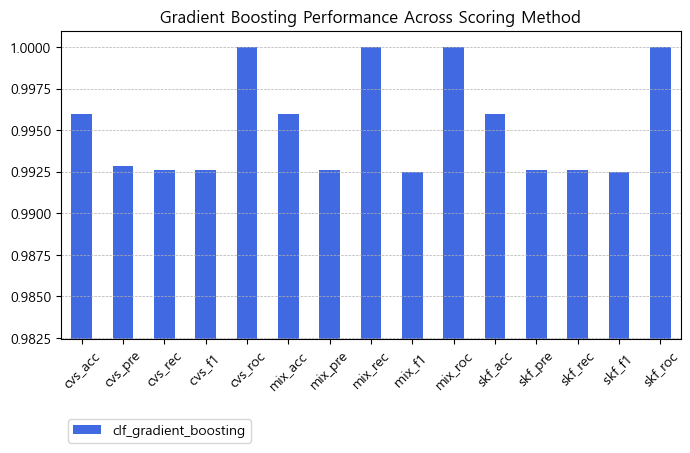

In [241]:
df_tmp = df_clf_scores[["clf_gradient_boosting", "name"]]

df_tmp.set_index('name').plot.bar(
    figsize = (8, 4),
    title= f"Gradient Boosting Performance Across Scoring Method",
    color = ['royalblue', ],
    xlabel = "",
    ylabel = "",
    ylim = [min(df_tmp["clf_gradient_boosting"])-0.01, max(df_tmp["clf_gradient_boosting"])+0.001],
    rot = 45
)

plt.legend(loc='center left', bbox_to_anchor=(0, -0.3))
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

## Regression

In [36]:
def reg_cross_validation(
    model: BaseEstimator,
    X: pd.DataFrame,
    y: pd.Series,
    cv: int = 5
) -> tuple[list[float]]:
    
    # No1 cv
    scores1 = dict()
    scores1['cvs_r2'] = cross_val_score(model, X, y, cv=cv, scoring='r2')
    scores1['cvs_mae'] = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    scores1['cvs_mse'] = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    scores1['cvs_rmse'] = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')

    # No2 cv    
    scores2 = dict()
    skfolds = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    scores2['mix_r2'] = cross_val_score(model, X, y, cv=skfolds, scoring='r2')
    scores2['mix_mae'] = cross_val_score(model, X, y, cv=skfolds, scoring='neg_mean_absolute_error')
    scores2['mix_mse'] = cross_val_score(model, X, y, cv=skfolds, scoring='neg_mean_squared_error')
    scores2['mix_rmse'] = cross_val_score(model, X, y, cv=skfolds, scoring='neg_root_mean_squared_error')
    
    # No3 cv
    scores3 = defaultdict(list)
    for fold_idx, (train_idx, val_idx) in enumerate(skfolds.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        scores = eval_reg_model(model, X_val, y_val)
        r2, mae, mse, rmse = scores
        
        scores3['skf_r2'].append(r2)
        scores3['skf_mae'].append(mae)
        scores3['skf_mse'].append(mse)
        scores3['skf_rmse'].append(rmse)
    
    return scores1,scores2, scores3

In [161]:
def print_reg_score(
    model: BaseEstimator,
    scores1: dict(),
    scores2: dict(),
    scores3: dict()
) -> None:    
    # Scores1: cross_val_score
    for key, value in scores1.items():
        print(f'{key}: {np.mean(value)}')

    # Scores2: StratifiedKFold by cross_val_score
    for key, value in scores2.items():
        print(f'{key}: {np.mean(value)}')

    # Scores3: StratifiedKFold score
    for key, value in scores3.items():
        print(f'{key}: {np.mean(value)}')

## reg 모델 점수 평가

In [170]:
df_reg_scores = pd.DataFrame()
Y = y_rank

for model_name, model in tqdm(reg_model_dict.items()):
    model, X_train, X_test, y_train, y_test = fit_model(model, X, Y)    
    scores1,scores2, scores3 = reg_cross_validation(
        model,
        X_train,
        y_train,
        5
    )
    
    # print_reg_score(model, scores1, scores2, socres3)
    values = (
        [abs(np.mean(s)) for s in scores1.values()] + 
        [abs(np.mean(s)) for s in scores2.values()] + 
        [abs(np.mean(s)) for s in scores3.values()]
    )    
    
    df_tmp = pd.DataFrame({model_name: values})
    df_reg_scores = pd.concat([df_reg_scores, df_tmp], axis=1)
    
keys = [k for k in scores1.keys()] + [k for k in scores2.keys()] + [k for k in scores3.keys()]
df_reg_scores = pd.concat([df_reg_scores, pd.DataFrame({"name":keys})], axis=1)
df_reg_scores

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:22<00:00,  3.29s/it]


,reg_ridge,reg_lasso,reg_linear_regression,reg_adaboost,reg_gradient_boosting,reg_random_forest,reg_xgb,name
0,0.610481,0.306852,0.610268,0.564903,0.706668,0.707633,0.654321,cvs_r2
1,1.465218,2.088302,1.464303,1.544242,1.101816,1.041986,1.212046,cvs_mae
2,3.526036,6.383027,3.526623,4.027141,2.673516,2.639516,3.133300,cvs_mse
3,1.874784,2.522112,1.874996,2.005772,1.633416,1.633625,1.767470,cvs_rmse
4,0.622880,0.313534,0.622649,0.576761,0.709920,0.702171,0.681856,mix_r2
5,1.448581,2.084117,1.447539,1.609537,1.108456,1.046726,1.135170,mix_mae
6,3.498217,6.373015,3.500252,4.164645,2.700049,2.713035,2.950288,mix_mse
7,1.864674,2.521946,1.865290,2.013414,1.640940,1.651036,1.710481,mix_rmse
8,0.622880,0.313534,0.622649,0.560810,0.709553,0.703133,0.681856,skf_r2
9,1.448581,2.084117,1.447539,1.579090,1.111349,1.046764,1.135170,skf_mae


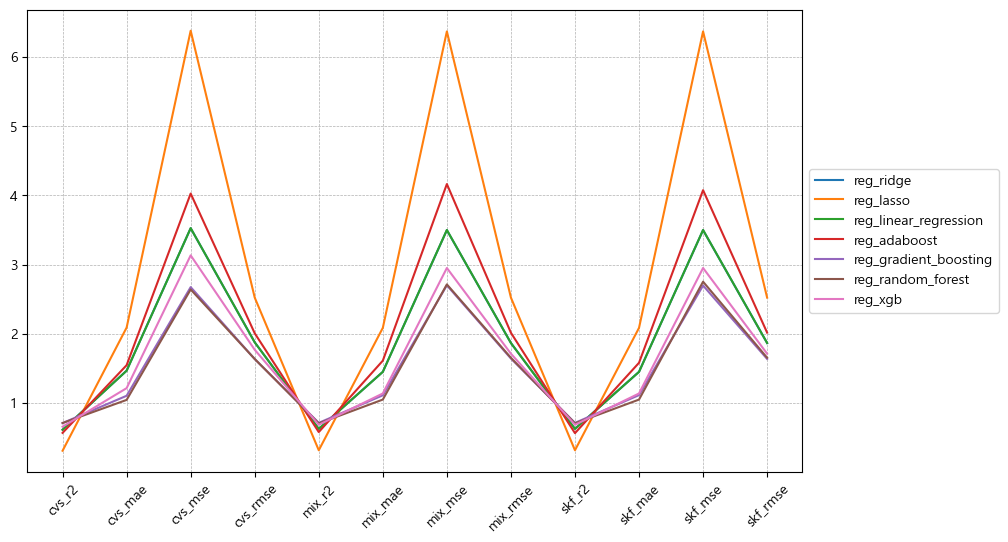

In [171]:
df_reg_scores.plot(
    figsize = (10, 6),
    rot = 45
).set_xticks(df_reg_scores.index, df_reg_scores.name)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, axis='x')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

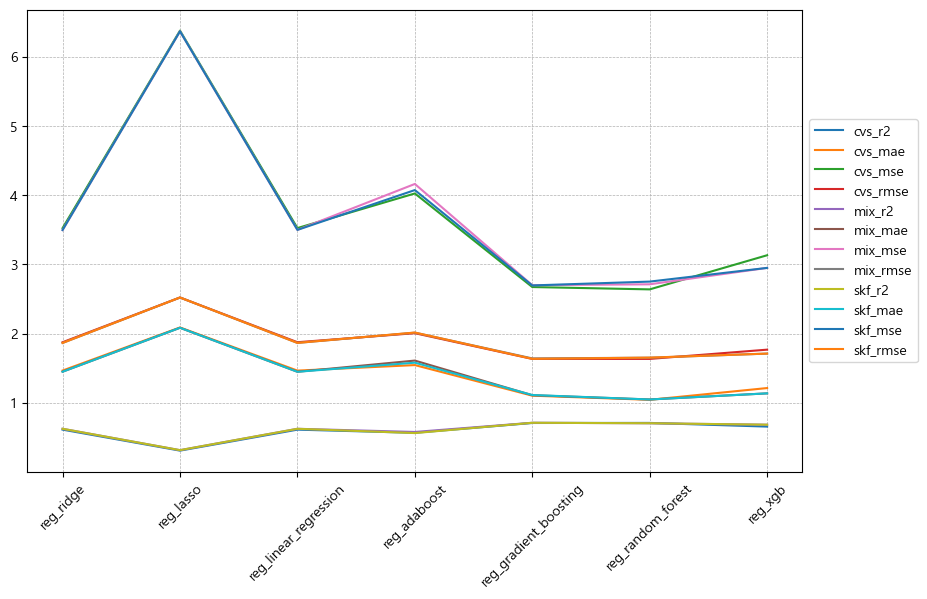

In [229]:
df_reg_scores.set_index('name').T.plot(
    figsize = (10, 6),
    rot = 45
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', linewidth=0.5, axis='x')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

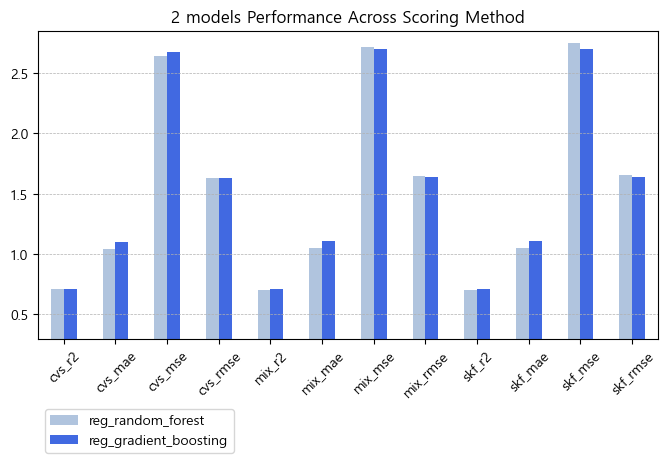

In [227]:
df_tmp = df_reg_scores[["reg_random_forest", "reg_gradient_boosting", "name"]]

df_tmp.set_index('name').plot.bar(
    figsize = (8, 4),
    title= f"2 models Performance Across Scoring Method",
    color = ['lightsteelblue', 'royalblue', 'grey'],
    xlabel = "",
    ylabel = "",
    ylim = [0.3, max(df_tmp["reg_random_forest"])+0.1],
    rot = 45
)

plt.legend(loc='center left', bbox_to_anchor=(0, -0.3))
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Test model

## Classification

In [40]:
# columns_name = [
#     'game_count',
#     'game_goal',
#     'cur_game_count',
#     'cc',
#     'part_people',
#     'track_E_encoded',
# ]

# new_data = [
#     1,    # 'game_count'
#     12,   # 'game_goal'
#     2,    # 'cur_game_count'
#     150,  # 'cc'
#     12,   # 'part_people'
#     71,  # 'track_E_encoded'
# ]

# df = pd.DataFrame([new_data], columns=columns_name)
# proba = rank_model.predict(df)
# f'{proba[0]:.0f}등'

## Regression

In [41]:
# columns_name = [
#     'game_count',
#     'game_goal',
#     'cur_game_count',
#     'cc',
#     'part_people',
#     'track_E_encoded',
# ]

# new_data = [
#     1,    # 'game_count'
#     12,   # 'game_goal'
#     2,    # 'cur_game_count'
#     150,  # 'cc'
#     12,   # 'part_people'
#     71,  # 'track_E_encoded'
# ]

# df = pd.DataFrame([new_data], columns=columns_name)
# proba = result_model.predict_proba(df)
# f, t = proba.flatten()

# print(f"True  probability: {t}")
# print(f"False probability: {f}")

# Hyperparameter Tuning

In [42]:
# https://velog.io/@hyunicecream/GridSearchCV%EB%9E%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%A0%EA%B9%8C


def hyper_tuning():
    # No5 cv
    param_grid = {
        "C": [0.1, 1, 10, 100],
    }
    grid_search = GridSearchCV(model, param_grid, cv = 5)
    grid_search.fit(X, y)
    
    return grid_search.best_params_, grid_search.best_score_